In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
from bs4 import BeautifulSoup
import requests

In [17]:
# https://search.naver.com/search.naver?where=news&sm=tab_pge&query=&start=1
                
search = '강남구'
page = [str(i) + '1' for i in range(400)]

In [22]:
news_title = ''
headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/100.0.48496.75" }

for i in page :
    url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + str(i)
    original_html = requests.get(url, headers=headers)
    html = BeautifulSoup(original_html.text, "html.parser")
    articles = html.select("div.group_news > ul.list_news > li div.news_area > a")
    for k in articles:
        news_title += (k.attrs['title'] + ' ')

In [23]:
print(news_title) # text data

"첫째만 낳아도 400만원"…강남구, 출산지원금 확대 강남구 일자리 창출 우수기업 11개사…지방세 조사유예 혜택 강남구, '왓츠 강남' 홍보영상 공개... "다양한 문화콘텐츠 선보일 것" 아이 낳으면 1000만원 지원…강남구 "200만원 더" "서울 강남구 업무협약시 실효성있게"... 구의회, 체결근거 마련 내년 부모급여 월 70만원…강남구 "거기에 200만원 더" 강남구의회, 제308회 정례회 폐회 강남구의회, '스토킹 범죄 예방 및 지원 조례' 제정 강남구 '장애인 복지포털' 구축…68개 제도 정보 한눈에 강남구 스쿨존서 또 참변…12살 초등생 버스 치여 숨져 강남구, 첫째·둘째 아이 출산양육지원금 200만원, 산후건강관리 100만 지원 정진석 비대위 100일 회견 대신 봉사활동, 강남구 구룡마을 연탄배달 [아파트 실거래] 강남구 대우디오빌 전용 39㎡ 3억2000만 원에 거래 서울 ‘영유’ 가장 비싼 곳은 강남구 아닌 동작구 ‘이곳’ 강남구의회, 제308회 정례회 폐회 강남구 '장애인 복지포털' 구축…68개 제도 정보 한눈에 강남구의회 김현정 의원, "어린 생명을 희생시킨 무책임한 범죄 음주운전 끝나야 한다" 강남구 신사동, ‘트리아트 니팅(나무 뜨개옷)’ 전시 강남구의회, 제308회 2차 정례회 마무리…예산안 1조2846억원 수정 가결 내년에 출산하면 부모급여 월 70만 원...강남구 "2백만 원 더" 강남구, 언북초 스쿨존에 내년 2월 보도 설치한다 강남구의회 복진경 의원, "학부모들의 마음에 피눈물이 맺히는 사건 사고들 발생하지 않길" 김진경 강남구의원, ‘서울특별시 강남구 스토킹범죄 예방 및 피해지원에 관한 조례안’대표 발의 ‘스쿨존 사고’ 서울 강남구 언북초 앞 보도 생긴다 "이번 연말 코엑스에서 놀자" 강남구 '윈터페스티벌' 개최 강남구, ‘장애인 복지포털’ 공식 오픈 강남구 개포주공5단지, 최고 35층 1277세대 아파트로 재건축 [단독]면세점 많은 서울 중구 지고, 의료관광 강남구 떴다 [자막뉴스] "200만 원 줄게" 강남구의 파격적인 출

In [25]:
okt = Okt()
nouns = okt.nouns(news_title) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

(-0.5, 1999.5, 1599.5, -0.5)

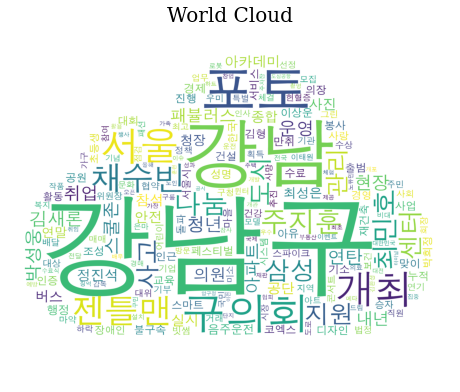

In [35]:
im = Image.open('cloud.png') 
mask_arr = np.array(im) 

wc = WordCloud(font_path='AppleGothic', width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white')
gen = wc.generate_from_frequencies(c)
plt.figure(figsize = (8, 8))
plt.imshow(gen)
plt.title("World Cloud", fontsize = 20, fontfamily = 'Serif')
plt.axis('off')

In [77]:
max_item = c.most_common(40)

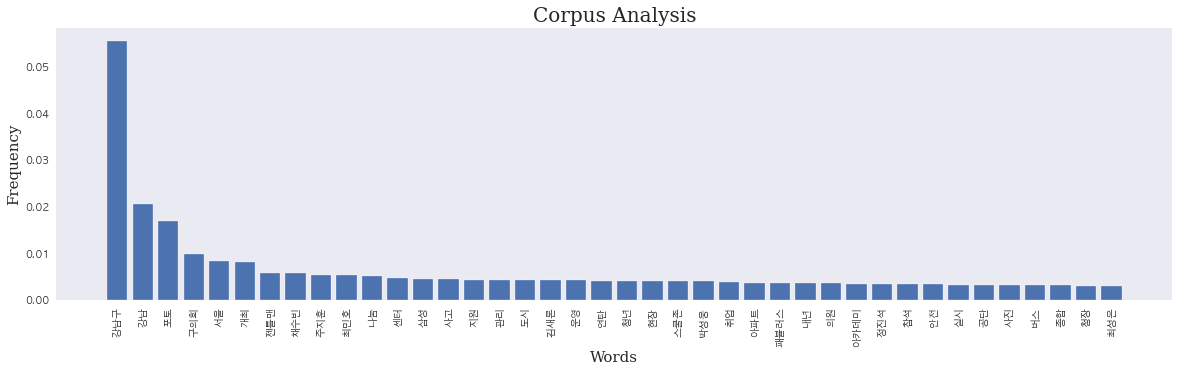

In [78]:
import pandas as pd
import seaborn as sns
sns.set_style('dark')
plt.figure(figsize = (20,5))
plt.rc('font', family = 'AppleGothic')
plt.bar(pd.Series(dict(max_item)).index, pd.Series(dict(max_item)).values/len(words))
plt.xticks(rotation = 90)
plt.ylabel('Frequency', fontsize = 15, fontfamily = 'Serif')
plt.xlabel('Words', fontsize = 15, fontfamily = 'Serif')
plt.title('Corpus Analysis', fontsize = 20, fontfamily = 'Serif')
plt.show()